In [21]:
#Import the right package
from scipy.io import loadmat
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
from PIL import Image, ImageOps
import imageio
%matplotlib inline

In [22]:
#Load the data
metaData = loadmat("wiki_labeled.mat",squeeze_me=True, struct_as_record=True)

In [23]:
#Here is the entire matlab structure data

In [24]:
#Get the dob field from the structure data
dob = metaData['wiki_labeled']['dob'].item(0)
photo_taken = metaData['wiki_labeled']['photo_taken'].item(0)
full_path = metaData['wiki_labeled']['full_path'].item(0)
gender = metaData['wiki_labeled']['gender'].item(0)
name = metaData['wiki_labeled']['name'].item(0)
face_location = metaData['wiki_labeled']['face_location'].item(0)
face_score = metaData['wiki_labeled']['face_score'].item(0)
second_face_score = metaData['wiki_labeled']['second_face_score'].item(0)
dob_str = metaData['wiki_labeled']['dob_str'].item(0)
age = metaData['wiki_labeled']['age'].item(0)
ID = metaData['wiki_labeled']['ID'].item(0)

In [25]:
#See how it looks
print(photo_taken)
dob.shape
agex = age[:574]
agex.shape

[2009 2008 1961 ... 2013 2011 2008]


(574,)

In [27]:
#It is neat, isn't it?
y = { 'age': age}
x = {'dob': dob, 'photo_taken': photo_taken, 'full_path': full_path, 'gender': gender, 'name': name, 'face_location': face_location, 'face_score': face_score, 'second_face_score': second_face_score, 'dob_str': dob_str, 'ID': ID}

In [28]:
x_df = pd.DataFrame(data=x)
y_df = pd.DataFrame(data=y)

In [29]:
allImg = np.ones([60327,10000])

i=0
for f in os.listdir('wiki_labeled/'):
    for k in os.listdir('wiki_labeled/' + f  + '/'):
        
        img = imageio.imread('wiki_labeled/'+f +'/'+k+'/')
        allImg[i] = img.flatten()
        i= i+1
#    allImg = np.append(allImg, img, axis=1)
        


In [30]:
print(allImg.shape)

(60327, 10000)


In [31]:
#print(allImg.shape)
x_train, x_test, y_train, y_test = train_test_split(allImg, age, test_size = 0.2, random_state = 2)

# x_train = x_train.T
# x_test = x_test.T
x_train = StandardScaler().fit_transform(x_train)
x_test = StandardScaler().fit_transform(x_test)
print(x_test.shape)
print(y_test.shape)
print(y_train.shape)
print(x_train.shape)

(12066, 10000)
(12066,)
(48261,)
(48261, 10000)


In [32]:

avgXImg = np.mean(x_train, axis=0, keepdims=True)
avgTestXImg = np.mean(x_test, axis=0, keepdims=True)

print(avgXImg.shape)

(1, 10000)


In [33]:
centXData = x_train - avgXImg
centXData.shape
centTestXData = x_test - avgTestXImg

In [34]:
#m = np.size(centData,0) - 1
covX = np.cov(centXData.T)

#AAT = np.dot(centData, centData.T)
print(covX.shape)

(10000, 10000)


In [35]:

U, EvalX, EvecX = np.linalg.svd(covX)



# print(aimg.shape)
# aimg = aimg[:,518]
# print(aimg.shape)
# aimg = aimg.reshape(100,100)
# print(aimg.shape)
# plt.imshow(aimg)

In [36]:
np.savetxt("Evecs.csv", EvecX[0:20:], delimiter=",")

(10000, 10000)
(10000,)


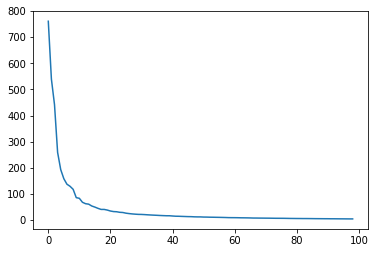

In [37]:
print(EvecX.shape)
print(EvalX.shape)
img = EvecX[2].reshape(100,100)
plt.plot(EvalX[1:100:])
plt.show()

In [38]:
k = 20

#PCA = EvecX[0:k:]
PCA = np.genfromtxt('Evecs.csv', delimiter=',')
print(PCA.shape)

(20, 10000)


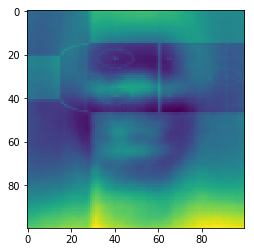

In [39]:
plt.imshow(PCA[0].reshape(100,100))

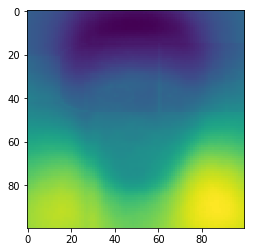

In [40]:
plt.imshow(PCA[2].reshape(100,100))

In [41]:
omega = np.dot(PCA, centXData.T)
omegaTest = np.dot(PCA, centTestXData.T)

KeyboardInterrupt: 

In [ ]:
# scaler = StandardScaler()
# scaler.fit(omega)
# omega = scaler.transform(omega)
# scaler.fit(omegaTest)
# omegaTest = scaler.transform(omegaTest)

In [21]:
print(omega)

[[ 4.29414966 -0.69977321 -0.57274792 ... -3.68998653 -1.25265432
  -0.216277  ]
 [-0.92398441  1.30126402  0.61558525 ... -0.38634168 -2.73131464
  -1.95048836]
 [-0.1704073  -1.52459605 -3.03386839 ... -0.22892059 -0.8685382
  -1.47215759]
 ...
 [-0.21361265  0.63884384  0.43567077 ...  0.19684224  0.32730736
   0.36567384]
 [-0.18882931  0.33164551  0.13729179 ...  0.09878408  0.21784162
   0.28674381]
 [-0.18431139  0.328716    0.39854559 ...  0.29439826  0.29451927
  -0.37567212]]


In [22]:
proj = np.dot(PCA.T, omega)

In [23]:
proj.shape

(10000, 459)

In [44]:
#proj = proj.T
aImg = proj[3]
print(aImg.shape)
aImg = aImg.reshape(100,100)

(10000,)


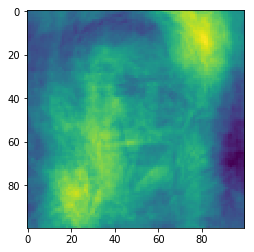

In [45]:
plt.imshow(aImg)

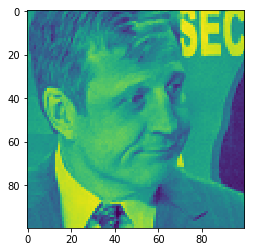

In [46]:
#plt.imshow(centXData[12].reshape(100,100))
plt.imshow(centXData[3].reshape(100,100))

In [47]:
def SGD(X, y, w0, alpha, num_iters):
    
    start_iter = 0
    m = len(y)
    print(len(y))
    for it in range(start_iter,num_iters):
        for i in range(0,m):
            rand_ind = np.random.randint(0,m)
            #print(X.shape)
            #print(rand_ind)
            X_i = X[:,rand_ind]
            X_i = X_i.reshape(len(X_i), 1)
            #print(X_i.shape)
            #print(w0.shape)
            X_i = X_i.T
            y_i = y[rand_ind].reshape(1,1)
            prediction = np.dot(X_i, w0)
            print(prediction)
            yHat = prediction - y_i
            grad = (1/m) * alpha * X_i.T.dot(yHat)
            #print("weight" + str(w0[0]))
            #print("grad" + str(grad[0]))
            w0 = w0 - grad
            #print(i)
           
        
    return w0

In [48]:
w0 = np.ones([20,1])


In [49]:
weights = SGD(omega, y_train, w0, 0.01, 10)
print(weights.shape)
#print(weights)

459
[[8.8817842e-16]]
[[0.00167741]]
[[-0.00046894]]
[[0.01730593]]
[[0.0327234]]
[[0.00824548]]
[[0.00244332]]
[[0.00574199]]
[[-0.04299246]]
[[0.01284045]]
[[-0.05053918]]
[[0.00992639]]
[[-0.02344144]]
[[0.01029785]]
[[0.01422628]]
[[0.01067116]]
[[0.00902849]]
[[0.00752409]]
[[0.00870663]]
[[-0.0438046]]
[[-0.00164408]]
[[0.00946641]]
[[0.00251672]]
[[-0.05073423]]
[[0.00562457]]
[[-0.02232071]]
[[-0.00841023]]
[[-0.01290922]]
[[0.00874601]]
[[-0.01825007]]
[[-0.00083252]]
[[0.00313668]]
[[0.02355337]]
[[0.00194134]]
[[-0.03310485]]
[[-0.01989554]]
[[-0.02151717]]
[[-0.01014319]]
[[-0.02052016]]
[[0.01190272]]
[[0.00089162]]
[[-0.01304198]]
[[0.03250178]]
[[-0.00251257]]
[[-0.03000612]]
[[0.03614951]]
[[-0.01314173]]
[[-0.02796469]]
[[-0.02174129]]
[[0.02433511]]
[[0.0225453]]
[[-0.01665496]]
[[-0.00087539]]
[[0.00825583]]
[[-0.00659305]]
[[-0.02798775]]
[[0.00736188]]
[[-0.01411196]]
[[-0.00949368]]
[[0.00236343]]
[[-0.01077002]]
[[0.01136417]]
[[-0.00813659]]
[[0.023435]]
[[-0.04

[[-0.15341056]]
[[0.03301842]]
[[-0.27478758]]
[[0.09529723]]
[[-0.20876362]]
[[0.08332724]]
[[0.2927091]]
[[-0.37332444]]
[[-0.42184832]]
[[-0.06903083]]
[[0.06378655]]
[[-0.12849815]]
[[-0.02653456]]
[[-0.12802325]]
[[-0.36970639]]
[[-0.10942182]]
[[-0.27009649]]
[[-0.15937564]]
[[-0.08509242]]
[[0.17955715]]
[[0.14822993]]
[[-0.3084174]]
[[0.00825481]]
[[-0.26003381]]
[[0.01614198]]
[[-0.33906323]]
[[0.05354164]]
[[0.10505579]]
[[-0.31364909]]
[[-0.08104389]]
[[0.23495974]]
[[0.18684326]]
[[-0.03284542]]
[[0.12642386]]
[[-0.02563503]]
[[0.033379]]
[[-0.11805307]]
[[0.09867647]]
[[0.20005892]]
[[-0.01699607]]
[[0.02969734]]
[[0.13543065]]
[[-0.34522356]]
[[-0.14014709]]
[[-0.05530815]]
[[-0.28892634]]
[[0.20123945]]
[[0.04459351]]
[[0.02451891]]
[[-0.12175684]]
[[0.06804342]]
[[-0.19156414]]
[[-0.29463462]]
[[0.30755199]]
[[-0.24057338]]
[[0.19679144]]
[[0.25205117]]
[[0.23830037]]
[[0.13234438]]
[[0.21758013]]
[[-0.30191626]]
[[-0.28217209]]
[[-0.05236326]]
[[-0.03866955]]
[[0.01135

[[-0.30070007]]
[[-0.39466011]]
[[0.37804746]]
[[0.03230653]]
[[-0.2403596]]
[[0.38107414]]
[[0.3494988]]
[[-0.05168146]]
[[-0.33994463]]
[[-0.43791597]]
[[0.06765221]]
[[0.3096664]]
[[0.38858187]]
[[0.20939394]]
[[-0.17614199]]
[[-0.22742019]]
[[0.45282682]]
[[0.0639142]]
[[-0.26402744]]
[[-0.08633847]]
[[0.16983114]]
[[-0.425473]]
[[-0.23479854]]
[[0.02761068]]
[[0.28999875]]
[[-0.05771844]]
[[0.3477427]]
[[-0.23069033]]
[[-0.49292194]]
[[0.16543343]]
[[0.65927829]]
[[-0.5456397]]
[[0.06633925]]
[[0.12725412]]
[[-0.22748495]]
[[-0.22233145]]
[[-0.04663848]]
[[0.6184054]]
[[-0.43015308]]
[[0.62612071]]
[[0.04411619]]
[[-0.20032385]]
[[0.34781405]]
[[-0.19564367]]
[[-0.11383925]]
[[-0.19430853]]
[[-0.21213395]]
[[-0.25322352]]
[[0.44470205]]
[[-0.25684789]]
[[0.63964038]]
[[-0.24288156]]
[[-0.42549381]]
[[0.07394128]]
[[-0.33511333]]
[[0.35312141]]
[[-0.21443116]]
[[0.57664798]]
[[0.70466331]]
[[-0.32911442]]
[[0.4540711]]
[[0.13019526]]
[[0.52181234]]
[[0.33541364]]
[[-0.24593486]]
[[

[[-0.0125019]]
[[0.20595569]]
[[0.73905403]]
[[0.67778339]]
[[-0.1597364]]
[[-0.75533845]]
[[-0.13250799]]
[[-0.15819233]]
[[0.77526923]]
[[-0.13062249]]
[[0.2528631]]
[[-0.10077408]]
[[-0.68152265]]
[[-0.09594829]]
[[0.27786664]]
[[-0.68895613]]
[[-0.14189942]]
[[0.62293661]]
[[-0.09770173]]
[[-0.0729088]]
[[-0.30952401]]
[[-0.53155338]]
[[-0.11777671]]
[[0.26682555]]
[[0.76941263]]
[[0.16114053]]
[[-0.29370352]]
[[0.04441319]]
[[0.39706721]]
[[-0.15150389]]
[[0.41075892]]
[[-0.13314826]]
[[-0.07980592]]
[[-0.11575063]]
[[-0.08078162]]
[[0.53213068]]
[[-0.36031386]]
[[-0.39892441]]
[[0.65680052]]
[[0.94077692]]
[[-0.93642756]]
[[0.52877486]]
[[0.77551438]]
[[-0.36393102]]
[[-0.0826544]]
[[0.4745326]]
[[0.64023178]]
[[0.52323311]]
[[0.70894994]]
[[1.16508873]]
[[-1.12296371]]
[[-0.91579184]]
[[-0.15057459]]
[[0.49769669]]
[[0.78912927]]
[[-0.72817714]]
[[0.72746874]]
[[-0.68886666]]
[[-0.77409538]]
[[0.55413008]]
[[0.20923926]]
[[0.49469773]]
[[0.72016887]]
[[-0.11475034]]
[[0.82329347

[[-0.61789369]]
[[0.88827012]]
[[0.09637337]]
[[0.07862952]]
[[0.55014845]]
[[-0.07270482]]
[[0.69219303]]
[[-0.05798775]]
[[1.01587158]]
[[-0.41298057]]
[[-0.40417705]]
[[0.44087163]]
[[0.31661362]]
[[0.33781626]]
[[-0.08361259]]
[[-0.40235403]]
[[0.81066582]]
[[0.2280594]]
[[-0.38119165]]
[[-0.64721907]]
[[-0.37549278]]
[[0.44169289]]
[[-0.09492887]]
[[0.82192262]]
[[0.63059792]]
[[0.70149021]]
[[0.35846342]]
[[0.23015817]]
[[0.36739029]]
[[-0.84046427]]
[[0.60690778]]
[[0.75569678]]
[[0.26822666]]
[[-0.36075028]]
[[-0.13585109]]
[[-0.36660059]]
[[0.93674686]]
[[0.18344048]]
[[-0.99019273]]
[[0.61427484]]
[[0.85693489]]
[[0.25848055]]
[[1.55248626]]
[[-0.31306745]]
[[-0.72227257]]
[[0.39688908]]
[[0.05081258]]
[[-0.30396084]]
[[-0.29378016]]
[[-0.28816544]]
[[-0.26082874]]
[[0.10357917]]
[[0.02718338]]
[[-0.77094338]]
[[-0.74765952]]
[[0.41268933]]
[[0.05658083]]
[[0.69899202]]
[[1.13442434]]
[[0.493265]]
[[1.0579781]]
[[-0.04593151]]
[[-0.31493987]]
[[0.97654401]]
[[-0.45140419]]
[[

[[-0.10031716]]
[[-0.36392947]]
[[-0.43237436]]
[[0.33039419]]
[[-0.40665619]]
[[0.58765469]]
[[0.1496899]]
[[-1.30588093]]
[[1.25730422]]
[[-0.40854801]]
[[-0.03502942]]
[[0.84993731]]
[[0.17417045]]
[[1.36070299]]
[[-0.38978144]]
[[-0.77434614]]
[[0.63235666]]
[[-0.98894154]]
[[-0.38277423]]
[[0.21392889]]
[[-0.94620779]]
[[-1.28247416]]
[[-0.23935144]]
[[0.1931873]]
[[-1.10750921]]
[[0.17449487]]
[[-0.08864927]]
[[0.92230768]]
[[-0.68707659]]
[[-0.77690319]]
[[1.0911851]]
[[-0.37732791]]
[[0.90235251]]
[[-0.36705817]]
[[0.92230757]]
[[1.17376276]]
[[0.98621825]]
[[-0.34519361]]
[[-0.42617379]]
[[-0.38847704]]
[[-0.06075536]]
[[1.20415563]]
[[0.83151765]]
[[-0.4698578]]
[[-0.00306034]]
[[-0.20439898]]
[[-0.97248523]]
[[0.01788091]]
[[1.25476668]]
[[0.87177354]]
[[1.33746057]]
[[0.05738039]]
[[0.41040264]]
[[-0.95219963]]
[[1.28502278]]
[[1.15973749]]
[[-0.1594554]]
[[0.65429215]]
[[-1.34643181]]
[[-0.42521858]]
[[1.23236629]]
[[0.68334495]]
[[0.98710451]]
[[0.63289214]]
[[-0.77934623

[[1.32821084]]
[[1.02619991]]
[[0.41851168]]
[[-1.75044299]]
[[0.70669289]]
[[1.39169853]]
[[0.8654637]]
[[0.39326364]]
[[0.01184274]]
[[1.21024423]]
[[0.5202619]]
[[-0.2409385]]
[[-0.78543829]]
[[-0.44580188]]
[[0.00556857]]
[[-0.10339272]]
[[1.09033749]]
[[-0.62148361]]
[[0.11214953]]
[[-0.00347707]]
[[-1.08869097]]
[[-0.15628966]]
[[1.35238187]]
[[0.90511917]]
[[0.03128227]]
[[-1.09028013]]
[[-0.77716008]]
[[-1.6105889]]
[[0.87052697]]
[[-0.72975607]]
[[-1.54343251]]
[[0.39091466]]
[[1.33258479]]
[[-0.29274935]]
[[2.17002608]]
[[-0.70017831]]
[[0.03794707]]
[[-0.69285526]]
[[-0.82283153]]
[[-0.55606972]]
[[-0.5672115]]
[[0.51052509]]
[[0.08735817]]
[[-1.08982446]]
[[0.05917743]]
[[0.12139802]]
[[2.09093792]]
[[0.57702492]]
[[-0.71525856]]
[[-0.00669218]]
[[-0.69164186]]
[[0.99578017]]
[[1.30145362]]
[[-0.64328378]]
[[-0.74100504]]
[[-0.86007117]]
[[0.4497693]]
[[-0.6513233]]
[[-1.43578511]]
[[1.27239732]]
[[0.58977542]]
[[1.16255083]]
[[-0.9752722]]
[[-0.61753263]]
[[-1.07262443]]
[

In [50]:
pred = np.zeros([115,1])
p = 0
#print(omegaTest.shape)
#print(weights.shape)
#print(weights)
for i in range(0,115,1):
    pred[i] = np.dot(omegaTest[:,i], weights)
    print(pred[i])
    p = p + 1
error = pred - y_test
#print(pred.shape)
#print(pred)

#print(error)

[-0.77762054]
[0.58292836]
[-0.51991219]
[1.38791689]
[-0.51991219]
[1.37068275]
[-1.03636247]
[-0.05416761]
[0.33364232]
[1.22769934]
[-0.51991219]
[-0.51991219]
[0.96368685]
[-0.51991219]
[-0.51814617]
[-0.45450669]
[-1.24275024]
[-1.1937045]
[-0.99136167]
[0.04299986]
[0.33354224]
[0.06929602]
[0.89680238]
[-0.51991219]
[-0.51991219]
[-0.67648131]
[0.18134285]
[0.95141763]
[1.85992057]
[1.17417354]
[-0.10734657]
[-0.70756659]
[-5.45621275e-05]
[-0.07986732]
[0.70415592]
[1.88914731]
[-0.51991219]
[-0.51991219]
[-0.71748957]
[-1.01443273]
[0.16983432]
[1.02481259]
[0.1618789]
[0.45665899]
[-0.51991219]
[-0.99136167]
[0.61260643]
[-0.62619135]
[1.54657889]
[0.98587698]
[-0.51991219]
[0.83484524]
[1.03974959]
[0.78928012]
[1.28127803]
[-0.11412716]
[-0.51991219]
[-0.15117127]
[0.54432313]
[-0.51991219]
[0.00295837]
[0.93544481]
[0.48444888]
[-0.2371163]
[-1.08164135]
[1.33269018]
[-0.60434969]
[1.30866589]
[0.03447861]
[-0.28755484]
[0.0860507]
[-0.52606183]
[-0.15790411]
[-0.04230883]

In [350]:
print(np.mean(error))

-35.79549970022658


In [344]:
print(pred)
print(y_test)

[[-2.78161704]
 [ 4.95044576]
 [-3.15276087]
 [ 6.36405246]
 [-3.15276087]
 [ 7.4144537 ]
 [-5.75572025]
 [-1.34052883]
 [ 3.16699105]
 [ 5.21441734]
 [-3.15276087]
 [-3.15276087]
 [ 5.78879997]
 [-3.15276087]
 [-1.17905495]
 [-2.70531362]
 [-5.16909207]
 [-6.01798161]
 [-6.63695042]
 [-0.64075635]
 [ 0.99616634]
 [ 0.25163598]
 [ 4.8659364 ]
 [-3.15276087]
 [-3.15276087]
 [-2.61169227]
 [ 1.64865615]
 [ 5.22685107]
 [ 8.05531483]
 [ 6.5186145 ]
 [ 0.08378714]
 [-0.67422452]
 [ 0.59426636]
 [ 0.83019421]
 [ 3.81656388]
 [ 9.67673581]
 [-3.15276087]
 [-3.15276087]
 [-4.65615386]
 [-3.71055637]
 [ 1.89764098]
 [ 5.87061081]
 [ 3.13488306]
 [ 3.55210964]
 [-3.15276087]
 [-6.63695042]
 [ 2.48159525]
 [-2.93936061]
 [ 7.93356021]
 [ 5.99491728]
 [-3.15276087]
 [ 2.35606897]
 [ 6.30101592]
 [ 4.85555123]
 [ 5.70781412]
 [ 1.00247236]
 [-3.15276087]
 [-1.22913921]
 [ 4.01143057]
 [-3.15276087]
 [-1.39589734]
 [ 3.81460463]
 [ 4.20868096]
 [-0.25579744]
 [-2.84672025]
 [ 5.45771453]
 [-3.25438